textbook walkthrough

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# read Iris data from pydatset
df = data('iris')

df.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [2]:
# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]


In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [4]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


In [5]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='species', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['species'])
y_train = train.species

X_validate = validate.drop(columns=['species'])
y_validate = validate.species

X_test = test.drop(columns=['species'])
y_test = test.species


In [6]:
X_train

(84, 5)

In [7]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)


In [8]:
# model.fit(X, y)

clf = clf.fit(X_train, y_train)


[Text(0.3333333333333333, 0.875, 'x[2] <= 2.6\ngini = 0.667\nsamples = 84\nvalue = [28, 28, 28]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 28\nvalue = [28, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.75\ngini = 0.5\nsamples = 56\nvalue = [0, 28, 28]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 25\nvalue = [0, 25, 0]'),
 Text(0.6666666666666666, 0.375, 'x[2] <= 4.95\ngini = 0.175\nsamples = 31\nvalue = [0, 3, 28]'),
 Text(0.5, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.071\nsamples = 27\nvalue = [0, 1, 26]')]

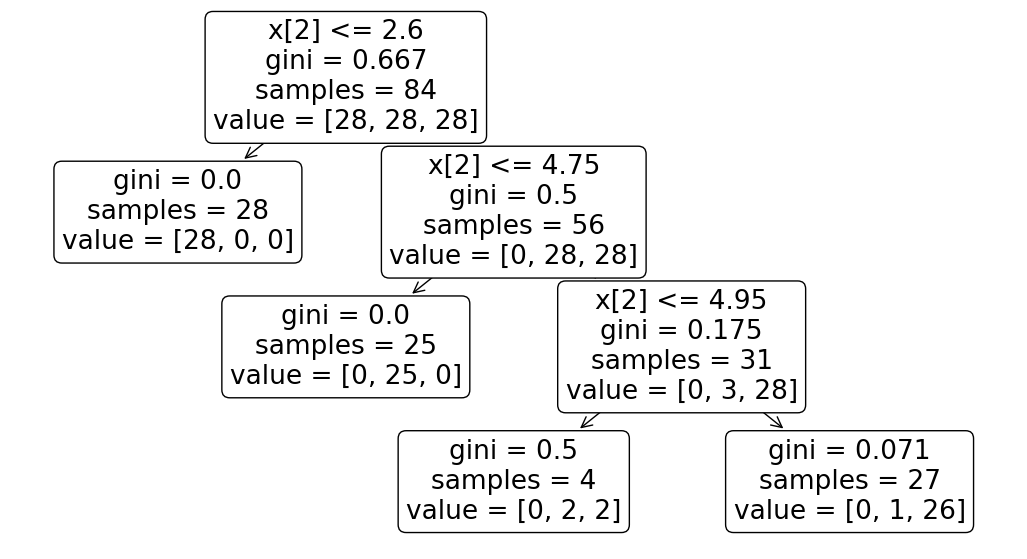

In [19]:
plt.figure(figsize=(13, 7))
plot_tree(clf, rounded=True)


In [26]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred


array(['versicolor', 'setosa', 'virginica', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolo

In [25]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]


array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.03703704, 0.96296296],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ]])

In [28]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.96


In [29]:
# confusion matrix

confusion_matrix(y_train, y_pred)


array([[28,  0,  0],
       [ 0, 27,  1],
       [ 0,  2, 26]])

In [30]:
y_train.value_counts()


species
versicolor    28
setosa        28
virginica     28
Name: count, dtype: int64

In [31]:
import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)


,setosa,versicolor,virginica
setosa,28,0,0
versicolor,0,27,1
virginica,0,2,26


In [32]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.93      0.96      0.95        28
   virginica       0.96      0.93      0.95        28

    accuracy                           0.96        84
   macro avg       0.96      0.96      0.96        84
weighted avg       0.96      0.96      0.96        84



In [35]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.94


In [36]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      1.00      0.92        12
   virginica       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



End textbook walkthrough

## Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.
 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)
 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.
 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
 5. Run through steps 2-4 using a different max_depth value.
 6. Which model performs better on your in-sample data?
 7. Which model performs best on your out-of-sample data, the validate set?

In [24]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


import acquire
import prepare 
import model

In [2]:
# get titanic data
df=acquire.get_titanic_data()

In [3]:
#clean titanic data
df = prepare.clean_titanic(df)

In [4]:
# preprep for ML
df = model.preprocess_titanic(df)

In [5]:
df

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,1
3,1,1,1,0,53.1000,0,0,0,1
4,0,3,0,0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1,1,0,1
887,1,1,0,0,30.0000,1,0,0,1
888,0,3,1,2,23.4500,0,0,0,1
889,1,1,0,0,30.0000,1,1,0,0


In [6]:
#split data
train, validate, test =prepare.split_data(df, 'survived')

train: 534 (60.0% of 891)
validate: 178 (20.0% of 891)
test: 179 (20.0% of 891)


In [7]:
train

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
776,0,3,0,0,7.7500,1,1,1,0
829,1,1,0,0,80.0000,1,0,0,1
215,1,1,1,0,113.2750,0,0,0,0
258,1,1,0,0,512.3292,1,0,0,0
129,0,3,0,0,6.9750,1,1,0,1
...,...,...,...,...,...,...,...,...,...
125,1,3,1,0,11.2417,0,1,0,0
360,0,3,1,4,27.9000,0,1,0,1
55,1,1,0,0,35.5000,1,1,0,1
298,1,1,0,0,30.5000,1,1,0,1


In [11]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [15]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [16]:
clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [17]:
# fit only with train!
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [18]:
# use it!
clf.predict(X_train)

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,

In [20]:
# make a baseline prediction:
train.survived.value_counts(normalize=True)

# mode is not survived or 0, baseline is .62

survived
0    0.616105
1    0.383895
Name: proportion, dtype: float64

In [21]:
y_pred = pd.DataFrame({'y_true': y_train.values,'baseline':0,'dt_one': clf.predict(X_train)}, index=train.index)




In [22]:
y_pred

,y_true,baseline,dt_one
776,0,0,0
829,1,0,1
215,1,0,1
258,1,0,1
129,0,0,0
...,...,...,...
125,1,0,0
360,0,0,0
55,1,0,0
298,1,0,0


In [26]:
# baseline again, another way to assign it to a variable
baseline_acc = accuracy_score(y_pred.y_true, y_pred.baseline)
baseline_acc

0.6161048689138576

In [28]:
# checking out validate
y_val_pred = pd.DataFrame({'y_true': validate.survived,'baseline':0,'dt_one': clf.predict(validate.drop(columns='survived'))}, index=validate.index)



y_val_pred

,y_true,baseline,dt_one
541,0,0,0
204,1,0,0
108,0,0,0
88,1,0,1
677,1,0,1
...,...,...,...
171,0,0,0
369,1,0,1
114,0,0,1
855,1,0,1


In [29]:
# how good is our first model?


accuracy_score(y_pred.y_true, y_pred.dt_one)


0.8146067415730337

In [30]:
# score for validate
accuracy_score(y_val_pred.y_true, y_val_pred.dt_one)


0.7865168539325843